In [1]:
import torch
from torch import nn

from torch.utils.data import Dataset # Base dataset class
from torch.utils.data import DataLoader # For batching and shuffling data

from torchvision import datasets # For built-in datasets
from torchvision import transforms # For transforming data from one format to another

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.__version__

'2.5.1+cu118'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
# Get the MNIST handwritten digits dataset
# Get the training dataset
MNIST_DIGITS_TRAIN = datasets.MNIST(root='./datasets/', 
                              train=True, download=True, 
                              transform=transforms.ToTensor())
# Get the testing dataset
MNIST_DIGITS_TEST = datasets.MNIST(root='./datasets/', 
                              train=False, download=True, 
                              transform=transforms.ToTensor())

len(MNIST_DIGITS_TRAIN), len(MNIST_DIGITS_TEST)

(60000, 10000)

In [5]:
LABELS = MNIST_DIGITS_TRAIN.classes

In [6]:
# Visualize our data
sample_X, sample_label = MNIST_DIGITS_TRAIN[0]
sample_X, sample_label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
sample_X.shape # (C, H, W) format

torch.Size([1, 28, 28])

In [8]:
sample_X = sample_X.squeeze(dim=0) # Get rid of the outer dimension
sample_X.shape

torch.Size([28, 28])

Text(0.5, 1.0, 'Label: 5 - five')

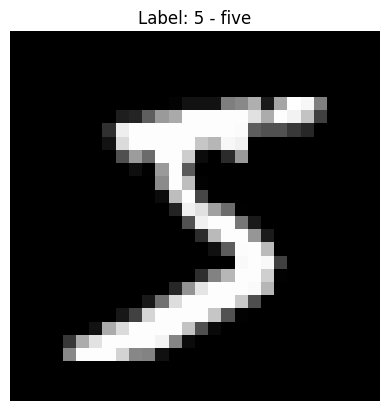

In [9]:
# Plot the image data using matplotlib
plt.imshow(sample_X, cmap='gray')
plt.axis(False)
plt.title(f'Label: {LABELS[sample_label]}')

In [10]:
# Let's create a function to plot random images
def plot_sample(index):
    # Get the image onto the correct format
    sample_X, sample_label = MNIST_DIGITS_TRAIN[index]
    sample_X = sample_X.squeeze(dim=0)

    # Show the image
    plt.imshow(sample_X, cmap='gray')
    plt.axis(False)
    plt.title(f'Label: {LABELS[sample_label]}')

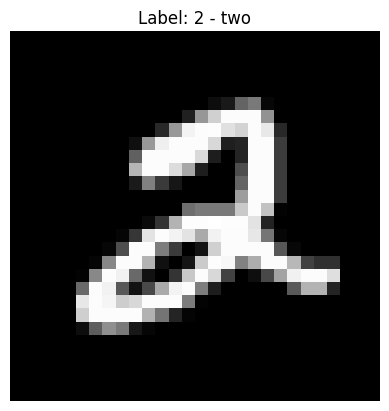

In [11]:
plot_sample(5) # Plot the 6th image in our training dataset

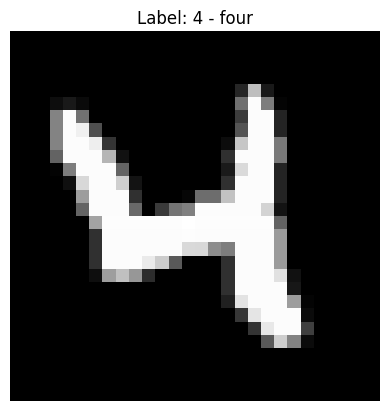

In [12]:
plot_sample(20) 

In [13]:
# Turn the image data into batches
batch_size = 32
train_dataloader = DataLoader(dataset=MNIST_DIGITS_TRAIN, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=MNIST_DIGITS_TEST, batch_size=batch_size, shuffle=False)

print(f'No. of training batches of size {batch_size}: {len(train_dataloader)}')
print(f'No. of testing batches of size {batch_size}: {len(test_dataloader)}')

No. of training batches of size 32: 1875
No. of testing batches of size 32: 313


In [14]:
# Create the CNN Model
class MNISTDigitClassifier(nn.Module):
    def __init__(self, in_features, hidden_units, out_features):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_features, out_channels=hidden_units, kernel_size=(2, 2), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(2, 2), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), # (B, C, H, W) -> (B, C*H*W)
            nn.Linear(in_features=360, out_features=len(LABELS)) # The value 360 is found by the computations
            # done in the cells below.
        )

    def forward(self, X):
        conv1_output = self.conv_layer_1(X)
        conv2_output = self.conv_layer_2(conv1_output)
        classifier_output = self.classifier(conv2_output)
        
        return classifier_output

In [15]:
# First, we will send a single image through our convolutional layers to see the transformed output shape of our image
# after going through the two convolutional layers

single_image, single_image_label =  MNIST_DIGITS_TRAIN[0]# (C, H, W)
single_image = single_image.unsqueeze(dim=0) # (B, C, H, W)

# Just the convolution layers
conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(2, 2), stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )
conv_layer_2 = nn.Sequential(
    nn.Conv2d(in_channels=10, out_channels=len(LABELS), kernel_size=(2, 2), stride=1, padding=0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2))
)


# Pass it through the model
output1 = conv_layer_1(single_image)
output2 = conv_layer_2(output1)
print(f'Shape of the original image: {single_image.shape}')
print(f'Shape after first conv. layer: {output1.shape}')
print(f'Shape after second conv. layer: {output2.shape}')

Shape of the original image: torch.Size([1, 1, 28, 28])
Shape after first conv. layer: torch.Size([1, 10, 13, 13])
Shape after second conv. layer: torch.Size([1, 10, 6, 6])


In [16]:
# Here, we can see that the original image (1, 1, 28, 28) gets transformed into a shape of (1, 10, 6, 6). 
# After flattening the image, we will end up with a shape of (1, 360).
# Therefore, the in_features for the linear layer should be 360.
# We will update this in the model above.
cnn_model = MNISTDigitClassifier(in_features=1, hidden_units=10, out_features=len(LABELS))
logits = cnn_model(single_image)
logits.shape

torch.Size([1, 10])

In [17]:
# Create the loss function and the optimizer
learning_rate = 0.01

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=learning_rate, momentum=0.9)

In [18]:
# Create the training and testing loops
def train_step(model, X, y): # X -> batch of images, y -> vector of labels
    # Put the model in training mode
    model.train()
    
    # Forward pass
    logits = model(X) 

    # Calculate the loss
    # The loss function expects the shape of the logits to be in [batch_size, no. of classes] and the shape of the truth labels to be in 
    # [batch_size, ]
    loss = loss_function(logits, y)

    # Clear the gradients stored in the model parameters from previous backpropagation
    optimizer.zero_grad()

    # Backpropagate (Calculate gradients)
    loss.backward()

    # Update the model parameters
    optimizer.step()

    return {'loss': loss.item()}

In [19]:
def test_step(model, X, y):
    # Put the model in testing mode
    model.eval()

    with torch.no_grad():
        # Forward pass
        logits = model(X)

        # Calculate loss
        loss = loss_function(logits, y)
        
        predicted_labels = logits.argmax(dim=1)

        # Calculate the current batch's accuracy
        total_accurate = (predicted_labels == y).sum().item()
        accuracy_percentage = (float(total_accurate) / len(y)) * 100

    return {'loss': loss.item(), 'accuracy': accuracy_percentage}

In [20]:
# Send the model to GPU
cnn_model = cnn_model.to(device)
next(cnn_model.parameters()).is_cuda

True

In [21]:
# Run through a single train and test step
train_dict = train_step(cnn_model, single_image.to(device), torch.tensor(single_image_label).unsqueeze(dim=0).to(device))
print(train_dict['loss'])

2.270822763442993


In [24]:
# Create the training and testing loop
epochs = 50
for i in range(0, epochs):
    batch = 1
    print(f'---------- EPOCH: {i + 1}. ----------')
    for [X, y] in train_dataloader:
        train_dict = train_step(cnn_model, X.to(device), y.to(device))
        loss = train_dict['loss']
        batch += 1

        if batch%200 == 0:
            print(f'Batch: {batch}. Training Loss: {loss}')
            average_test_loss = 0
            average_test_accuracy = 0
                
            if i > 30:
                # Test the model
                for [test_X, test_y] in test_dataloader:
                    test_dict = test_step(cnn_model, test_X.to(device), test_y.to(device))
                    
                    test_loss = test_dict['loss']
                    accuracy = test_dict['accuracy']
    
                    average_test_loss += test_loss
                    average_test_accuracy += accuracy
                    
                average_test_loss = average_test_loss / len(test_dataloader)
                average_test_accuracy = average_test_accuracy / len(test_dataloader)
                
            print(f'Average test loss: {average_test_loss}. Average test accuracy: {average_test_accuracy}%')

---------- EPOCH: 1. ----------
Batch: 200. Training Loss: 0.23241141438484192
Average test loss: 0. Average test accuracy: 0%
Batch: 400. Training Loss: 0.3923683166503906
Average test loss: 0. Average test accuracy: 0%
Batch: 600. Training Loss: 0.049823977053165436
Average test loss: 0. Average test accuracy: 0%
Batch: 800. Training Loss: 0.2684915363788605
Average test loss: 0. Average test accuracy: 0%
Batch: 1000. Training Loss: 0.19791476428508759
Average test loss: 0. Average test accuracy: 0%
Batch: 1200. Training Loss: 0.2367895245552063
Average test loss: 0. Average test accuracy: 0%
Batch: 1400. Training Loss: 0.05905202031135559
Average test loss: 0. Average test accuracy: 0%
Batch: 1600. Training Loss: 0.02823125198483467
Average test loss: 0. Average test accuracy: 0%
Batch: 1800. Training Loss: 0.08453433215618134
Average test loss: 0. Average test accuracy: 0%
---------- EPOCH: 2. ----------
Batch: 200. Training Loss: 0.1048223078250885
Average test loss: 0. Average te

In [25]:
# Make some predictions using the model
def predict(model, X, y):
    logits = model(X)

    prediction_class = logits.argmax(dim=1).unsqueeze(dim=1)

    print(f'Actual Label: {y}. Prediceted Label: {prediction_class}')

In [26]:
for i in range(0, 10):
    X, y = MNIST_DIGITS_TEST[i]

    X = X.unsqueeze(dim=0)
    predict(cnn_model, X.to(device), y)

Actual Label: 7. Prediceted Label: tensor([[7]], device='cuda:0')
Actual Label: 2. Prediceted Label: tensor([[2]], device='cuda:0')
Actual Label: 1. Prediceted Label: tensor([[1]], device='cuda:0')
Actual Label: 0. Prediceted Label: tensor([[0]], device='cuda:0')
Actual Label: 4. Prediceted Label: tensor([[4]], device='cuda:0')
Actual Label: 1. Prediceted Label: tensor([[1]], device='cuda:0')
Actual Label: 4. Prediceted Label: tensor([[4]], device='cuda:0')
Actual Label: 9. Prediceted Label: tensor([[9]], device='cuda:0')
Actual Label: 5. Prediceted Label: tensor([[5]], device='cuda:0')
Actual Label: 9. Prediceted Label: tensor([[9]], device='cuda:0')


In [27]:
# Testing the model on our own data
# I have created a 28x28 image on paint.net of a handwritten 5
# First we load it 
from PIL import Image

In [28]:
img = Image.open('./datasets/images/five.png')
img

In [29]:
convert_tensor = transforms.ToTensor() # Convert the raw image to tensor of format (C, H, W)
img_tensor = convert_tensor(img)
img_tensor.shape

torch.Size([1, 28, 28])

In [30]:
img_tensor = img_tensor.unsqueeze(dim=0) # Add the batch dimension
img_tensor.shape

torch.Size([1, 1, 28, 28])

In [31]:
predict(cnn_model, img_tensor.to(device), 5)

Actual Label: 5. Prediceted Label: tensor([[5]], device='cuda:0')


In [33]:
# Save the model
torch.save(cnn_model.state_dict(), './saved models/')

RuntimeError: [enforce fail at inline_container.cc:642] . invalid file name: ./saved models/